In [24]:
%matplotlib inline
import os
import sys
AbsPath = os.path.abspath("")
sys.path.append(AbsPath+"/../..")
import pandas as pd
import numpy as np
from Functions import Functions as F
import matplotlib.pyplot as plt
from colossus.cosmology import cosmology
cosmology.setCosmology("planck15")
Cosmo = cosmology.getCurrent()
h = Cosmo.h
#gets the HMF interpolation function
HMF_fun = F.Make_HMF_Interp() #N Mpc^-3 h^3 dex^-1

In [16]:
Header = ["M_zinf", "Mzret", "m", "m_new", "f_strip", "z_inf", "z_ret"]
df = pd.read_csv("./DataOutput/StrippingOtp_cpy.dat", header = None, names = Header, skiprows = 1)

In [17]:
df_ret = df[df.z_ret == 0.0001]

In [18]:
f_strip = df_ret.f_strip
Mzret = df_ret.Mzret

In [19]:
X = np.arange(0, 6, 0.1)
Bins = np.digitize(df_ret.z_inf, X)
Y = [np.mean(df_ret.f_strip[Bins == i]) for i in range(len(X))]
Y_err = [np.std(df_ret.f_strip[Bins == i]) for i in range(len(X))]
plt.errorbar(X, Y, yerr = Y_err)
#plt.plot(X, Y)
plt.show()

<IPython.core.display.Javascript object>

In [20]:
Subhalos = np.load("./Subhalos/Surviving_Subhalos_Stripped_ByParent1.0.dat.npy")

In [21]:
z0sub = Subhalos[0]
AnalyticHaloMass_min = 11.5; AnalyticHaloMass_max = 15.1; AnalyticHaloBin = 0.1
AHB_2 = AnalyticHaloBin*AnalyticHaloBin
AnalyticHaloMass = np.arange(AnalyticHaloMass_min + np.log10(h), AnalyticHaloMass_max + np.log10(h), AnalyticHaloBin)
SatHaloMass = np.arange(AnalyticHaloMass_min-1 + np.log10(h), AnalyticHaloMass_max-0.1 + np.log10(h), AnalyticHaloBin)

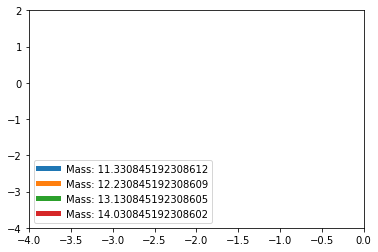

In [27]:
for i, Mass in enumerate(AnalyticHaloMass):
    Wt = HMF_fun(Mass, 0)
    X = SatHaloMass - Mass
    Y = np.divide(z0sub[i], Wt)
    if i % 9 == 0:
        plt.plot(X, np.log10(Y), label = "Mass: {}".format(Mass))
plt.xlim(-4, 0)
plt.ylim(-4, 2)
plt.legend(loc = 3)
plt.show()

In [46]:
Subhalos = np.load("./Subhalos/Surviving_Subhalos_ByParent1.5.npy")

In [47]:
z0sub = Subhalos[0]
AnalyticHaloMass_min = 11.5; AnalyticHaloMass_max = 15.1; AnalyticHaloBin = 0.1
AHB_2 = AnalyticHaloBin*AnalyticHaloBin
AnalyticHaloMass = np.arange(AnalyticHaloMass_min + np.log10(h), AnalyticHaloMass_max + np.log10(h), AnalyticHaloBin)
SatHaloMass = np.arange(AnalyticHaloMass_min-1 + np.log10(h), AnalyticHaloMass_max-0.1 + np.log10(h), AnalyticHaloBin)

In [48]:
print(z0sub)

[[  5.90947331e-03   4.54996413e-03   3.46629688e-03 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  6.50562172e-03   4.90041311e-03   3.69956688e-03 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  7.13147012e-03   5.38226460e-03   4.05750551e-03 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  3.73025413e-03   3.02195913e-03   2.44783196e-03 ...,   2.46140397e-08
    0.00000000e+00   0.00000000e+00]
 [  2.85279825e-03   2.31153755e-03   1.87210779e-03 ...,   9.06716454e-08
    1.51111631e-08   0.00000000e+00]
 [  2.07538484e-03   1.68183431e-03   1.36277844e-03 ...,   1.42989490e-07
    5.33203880e-08   8.82224578e-09]]


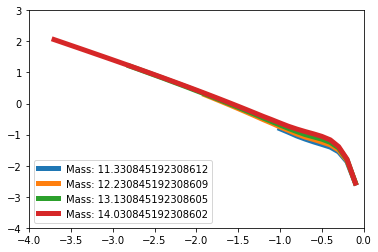

In [49]:
for i, Mass in enumerate(AnalyticHaloMass):
    Wt = HMF_fun(Mass, 0)
    X = SatHaloMass - Mass
    Y = np.divide(z0sub[i], Wt)
    if i % 9 == 0:
        plt.plot(X, np.log10(Y), label = "Mass: {}".format(Mass))
plt.xlim(-4, 0)
plt.ylim(-4, 3)
plt.legend(loc = 3)
plt.show()